<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/BJP2Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 93 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (93/93), done.


In [3]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-10-10"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#BiharWithNaMo")  
           
data1 = list(zip(text))
df1 = pd.DataFrame(data =data1, columns =["Tweet"])

df1.to_csv('bjp6.csv')

All #JoeBiden fans in India.
#Burnol is offering 99% off on its product buy it as 10thNov. You may need it.
#BiharWithNaMo
<--------------------------------------------------->
1
My Bihar election exit poll
BJP-90
JDU-50
RJD-65
CON-10
LJP-9
VIP-3
HM-3
Others-13
Both BJP and JDU are going to fo… https://t.co/TzX25MeAPw
<--------------------------------------------------->
2
RT @AtmanirbharRaj: if they can do this during elections, imagine what will happen if RJD &amp; so called “maha gattbandhan” (I call it “maha g…
<--------------------------------------------------->
3
RT @AtmanirbharRaj: if they can do this during elections, imagine what will happen if RJD &amp; so called “maha gattbandhan” (I call it “maha g…
<--------------------------------------------------->
4
RT @AtmanirbharRaj: if they can do this during elections, imagine what will happen if RJD &amp; so called “maha gattbandhan” (I call it “maha g…
<--------------------------------------------------->
5
RT @AtmanirbharRaj: i

# **Importing Libraries**

In [4]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning BJPDataset2**

```
# length of dataset2
```



In [5]:
tweets_list = df1['Tweet'].tolist()
len(tweets_list)

320

# **Removing Duplicate datasets if any**

In [6]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

65



```
No of duplicate tweets if any
```



In [7]:
df1['Tweet'].duplicated().sum()

255

In [8]:
df1 = df1.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df1.shape

(65, 1)

Removed duplicate tweets

# **Removing Emojis**

In [9]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df1['Processed_Tweet']=df1.Tweet.apply(remove_emoji)

`From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet'`





In [10]:
count = 0
for i in df1['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df1.drop(df1.loc[df1['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

32

In [11]:
df1.shape

(33, 2)

In [12]:
df1['Processed_Tweet']

0     All #JoeBiden fans in India.\n#Burnol is offer...
1     My Bihar election exit poll\nBJP-90\nJDU-50\nR...
5     Why is everyone loosing hope on Bihar already?...
6     I am sure @BJP4India led NDA will emerge Victo...
9     I request everyone in #Bihar to come forward &...
10    I request everyone in #Bihar to come forward &...
11    if they can do this during elections, imagine ...
12    Let’s Vote\nBihar Legislative Assembly General...
13    Finally voted for the first tym \n    Thnku co...
14    @NitishKumar @NitishKumar #GeneralDyer\n#Munge...
16    Today is the third and the last phase of #Biha...
20    Rahul Gandhi is no-where in #BiharElections202...
22    " And they Say, we never built great things. "...
23    @IGuruPrakash beat the baseless and factless p...
24    #BiharWithNamo\n#NDASangBihar \n\nTaking Bihar...
25    @IGuruPrakash slaps the runoff and false rehot...
31    This is @BJP4India'S Surya\n#BiharWithModi\n#B...
32    Why people in #BiharWithNDA ?? #BiharWithN

# **Removing Username**

In [13]:
df1['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df1['Processed_Tweet']] #remove usernames
df1['Processed_Tweet']

0     All #JoeBiden fans in India.\n#Burnol is offer...
1     My Bihar election exit poll\nBJP-90\nJDU-50\nR...
5     Why is everyone loosing hope on Bihar already?...
6     I am sure   led NDA will emerge Victorious on ...
9     I request everyone in #Bihar to come forward &...
10    I request everyone in #Bihar to come forward &...
11    if they can do this during elections, imagine ...
12    Let’s Vote\nBihar Legislative Assembly General...
13    Finally voted for the first tym \n    Thnku co...
14        #GeneralDyer\n#MungerKillings\n#Munger Sho...
16    Today is the third and the last phase of #Biha...
20    Rahul Gandhi is no-where in #BiharElections202...
22    " And they Say, we never built great things. "...
23      beat the baseless and factless promise of Te...
24    #BiharWithNamo\n#NDASangBihar \n\nTaking Bihar...
25      slaps the runoff and false rehotric narrativ...
31    This is   Surya\n#BiharWithModi\n#BiharWithNaM...
32    Why people in #BiharWithNDA ?? #BiharWithN

# **Removing URL if any**

In [14]:
df1['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df1['Processed_Tweet']] #Remove urls
df1['Processed_Tweet']

0     All #JoeBiden fans in India.\n#Burnol is offer...
1     My Bihar election exit poll\nBJP-90\nJDU-50\nR...
5     Why is everyone loosing hope on Bihar already?...
6     I am sure   led NDA will emerge Victorious on ...
9     I request everyone in #Bihar to come forward &...
10    I request everyone in #Bihar to come forward &...
11    if they can do this during elections, imagine ...
12    Let’s Vote\nBihar Legislative Assembly General...
13    Finally voted for the first tym \n    Thnku co...
14        #GeneralDyer\n#MungerKillings\n#Munger Sho...
16    Today is the third and the last phase of #Biha...
20    Rahul Gandhi is no-where in #BiharElections202...
22    " And they Say, we never built great things. "...
23      beat the baseless and factless promise of Te...
24    #BiharWithNamo\n#NDASangBihar \n\nTaking Bihar...
25      slaps the runoff and false rehotric narrativ...
31    This is   Surya\n#BiharWithModi\n#BiharWithNaM...
32    Why people in #BiharWithNDA ?? #BiharWithN

# **Removing Hashtags but keeping the word**

In [15]:
df1['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df1['Processed_Tweet']] # remove the # in #hashtag
df1['Processed_Tweet']

0     All JoeBiden fans in India.\nBurnol is offerin...
1     My Bihar election exit poll\nBJP-90\nJDU-50\nR...
5     Why is everyone loosing hope on Bihar already?...
6     I am sure   led NDA will emerge Victorious on ...
9     I request everyone in Bihar to come forward &a...
10    I request everyone in Bihar to come forward &a...
11    if they can do this during elections, imagine ...
12    Let’s Vote\nBihar Legislative Assembly General...
13    Finally voted for the first tym \n    Thnku co...
14        GeneralDyer\nMungerKillings\nMunger Shooti...
16    Today is the third and the last phase of Bihar...
20    Rahul Gandhi is no-where in BiharElections2020...
22    " And they Say, we never built great things. "...
23      beat the baseless and factless promise of Te...
24    BiharWithNamo\nNDASangBihar \n\nTaking Bihar f...
25      slaps the runoff and false rehotric narrativ...
31    This is   Surya\nBiharWithModi\nBiharWithNaMo ...
32    Why people in BiharWithNDA ?? BiharWithNaM

# **Using Preprocessor Library**

In [16]:
!pip install preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp36-none-any.whl size=4477 sha256=f1838c33a4cc7155d76fb948047eeadd9a68dc56a324b4c3da8d9eaeeab83385
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor


In [17]:
!pip install tweet-preprocessor

In [18]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df1['Processed_Tweet'] = [p.clean(i) for i in df1['Processed_Tweet']]
df1['Processed_Tweet']

0     All JoeBiden fans in India.Burnol is offering ...
1     My Bihar election exit pollBJP-90JDU-50RJD-65C...
5     Why is everyone loosing hope on Bihar already?...
6     I am sure led NDA will emerge Victorious on th...
9     I request everyone in Bihar to come forward &a...
10    I request everyone in Bihar to come forward &a...
11    if they can do this during elections, imagine ...
12    Lets VoteBihar Legislative Assembly General El...
13    Finally voted for the first tym Thnku corona H...
14    GeneralDyerMungerKillingsMunger Shooting: Comp...
16    Today is the third and the last phase of Bihar...
20    Rahul Gandhi is no-where in BiharElections2020...
22    " And they Say, we never built great things. "...
23    beat the baseless and factless promise of Teja...
24    BiharWithNamoNDASangBihar Taking Bihar from sh...
25    slaps the runoff and false rehotric narratives...
31    This is SuryaBiharWithModiBiharWithNaMo BiharW...
32    Why people in BiharWithNDA ?? BiharWithNaM

# **Removing any special characters,numbers,punctuation,etc..**

In [19]:
df1.Processed_Tweet = df1.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df1["Processed_Tweet"]

0     All JoeBiden fans in India Burnol is offering ...
1     My Bihar election exit pollBJP   JDU   RJD   C...
5     Why is everyone loosing hope on Bihar already ...
6     I am sure led NDA will emerge Victorious on th...
9     I request everyone in Bihar to come forward  a...
10    I request everyone in Bihar to come forward  a...
11    if they can do this during elections  imagine ...
12    Lets VoteBihar Legislative Assembly General El...
13    Finally voted for the first tym Thnku corona H...
14    GeneralDyerMungerKillingsMunger Shooting  Comp...
16    Today is the third and the last phase of Bihar...
20    Rahul Gandhi is no where in BiharElections    ...
22      And they Say  we never built great things   ...
23    beat the baseless and factless promise of Teja...
24    BiharWithNamoNDASangBihar Taking Bihar from sh...
25    slaps the runoff and false rehotric narratives...
31    This is SuryaBiharWithModiBiharWithNaMo BiharW...
32    Why people in BiharWithNDA    BiharWithNaM

# **Converting to Lowercase**

In [20]:
df1.Processed_Tweet = [low.lower() for low in df1.Processed_Tweet] #Converting into lower case
df1["Processed_Tweet"]

0     all joebiden fans in india burnol is offering ...
1     my bihar election exit pollbjp   jdu   rjd   c...
5     why is everyone loosing hope on bihar already ...
6     i am sure led nda will emerge victorious on th...
9     i request everyone in bihar to come forward  a...
10    i request everyone in bihar to come forward  a...
11    if they can do this during elections  imagine ...
12    lets votebihar legislative assembly general el...
13    finally voted for the first tym thnku corona h...
14    generaldyermungerkillingsmunger shooting  comp...
16    today is the third and the last phase of bihar...
20    rahul gandhi is no where in biharelections    ...
22      and they say  we never built great things   ...
23    beat the baseless and factless promise of teja...
24    biharwithnamondasangbihar taking bihar from sh...
25    slaps the runoff and false rehotric narratives...
31    this is suryabiharwithmodibiharwithnamo biharw...
32    why people in biharwithnda    biharwithnam

In [21]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

`We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that`

# **Removing stopwords**

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['wouldn', 'above', 'but', 'yourself', 'mustn', 'down', "weren't", 'not', "that'll", 'all', "doesn't", 'herself', "needn't", "couldn't", 'only', 'we', 'here', 'couldn', 'before', "mustn't", 'had', 'has', 'her', 'which', 'theirs', 'won', 'doing', "you're", 'is', "hadn't", 'hasn', 'these', 'why', 'ain', 'other', 'ourselves', 'whom', 'm', 'been', 'and', 'his', 'y', 'most', 'having', 'if', 'by', 'i', 'where', 'yourselves', 'their', 'or', 'was', 'as', 'nor', 'because', 'needn', 'your', 'now', 'on', 'further', 'same', 'under', 'what', 'just', 'over', 'that', 'hadn', 'who', 're', 'were', 'few', 'doesn', "you'd", 'o', 'any', 'ma', 'when', 'wasn', 't', "haven't", 'its', 'you', 'off', 'my', 'some', 'myself', 'd', 'between', "hasn't", 'can', 'll', 'while', 'himself', 'weren', "wouldn't", 'for', "it's", 'be', 'with', 'them', 'once', 'again', 'should', 'those', 'after', 'him', 'don', 'itself', 'me', "don't", 'she', 'an', 'to', 'he', 'do', 'the', "aren't", 'then', 'being', 'of', 've', 'at', 'shouldn

In [24]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df1['Processed_Tweet']

0     joebiden fans india burnol offering product bu...
1     bihar election exit pollbjp jdu rjd con ljp vi...
5     everyone loosing hope bihar already exit poll ...
6     sure led nda emerge victorious result day peop...
9     request everyone bihar come forward amp votefo...
10    request everyone bihar come forward amp votefo...
11    elections imagine happen rjd amp called maha g...
12    lets votebihar legislative assembly general el...
13    finally voted first tym thnku corona hope chan...
14    generaldyermungerkillingsmunger shooting compl...
16    today third last phase biharelections appeal c...
20    rahul gandhi biharelections special appearance...
22    say never built great things thepadmanabhaswam...
23    beat baseless factless promise tejaswi lakh jo...
24    biharwithnamondasangbihar taking bihar shortco...
25    slaps runoff false rehotric narratives true fa...
31         suryabiharwithmodibiharwithnamo biharwithbjp
32    people biharwithnda biharwithnamo please l

# **Tokenizing**

In [25]:
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df1['Processed_Tweet']

0     [joebiden, fans, india, burnol, offering, prod...
1     [bihar, election, exit, pollbjp, jdu, rjd, con...
5     [everyone, loosing, hope, bihar, already, exit...
6     [sure, led, nda, emerge, victorious, result, d...
9     [request, everyone, bihar, come, forward, amp,...
10    [request, everyone, bihar, come, forward, amp,...
11    [elections, imagine, happen, rjd, amp, called,...
12    [lets, votebihar, legislative, assembly, gener...
13    [finally, voted, first, tym, thnku, corona, ho...
14    [generaldyermungerkillingsmunger, shooting, co...
16    [today, third, last, phase, biharelections, ap...
20    [rahul, gandhi, biharelections, special, appea...
22    [say, never, built, great, things, thepadmanab...
23    [beat, baseless, factless, promise, tejaswi, l...
24    [biharwithnamondasangbihar, taking, bihar, sho...
25    [slaps, runoff, false, rehotric, narratives, t...
31      [suryabiharwithmodibiharwithnamo, biharwithbjp]
32    [people, biharwithnda, biharwithnamo, plea

# **Stemming**

In [26]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df1['Processed_Tweet']

0     [joebiden, fan, india, burnol, offer, product,...
1     [bihar, elect, exit, pollbjp, jdu, rjd, con, l...
5     [everyon, loos, hope, bihar, alreadi, exit, po...
6     [sure, led, nda, emerg, victori, result, day, ...
9     [request, everyon, bihar, come, forward, amp, ...
10    [request, everyon, bihar, come, forward, amp, ...
11    [elect, imagin, happen, rjd, amp, call, maha, ...
12    [let, votebihar, legisl, assembl, gener, elect...
13    [final, vote, first, tym, thnku, corona, hope,...
14    [generaldyermungerkillingsmung, shoot, complai...
16    [today, third, last, phase, biharelect, appeal...
20    [rahul, gandhi, biharelect, special, appear, a...
22    [say, never, built, great, thing, thepadmanabh...
23    [beat, baseless, factless, promis, tejaswi, la...
24    [biharwithnamondasangbihar, take, bihar, short...
25    [slap, runoff, fals, rehotr, narr, true, fact,...
31      [suryabiharwithmodibiharwithnamo, biharwithbjp]
32    [peopl, biharwithnda, biharwithnamo, pleas

In [27]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df1

,Tweet,Processed_Tweet
0,All #JoeBiden fans in India.\n#Burnol is offer...,"[joebiden, fan, india, burnol, offer, product,..."
1,My Bihar election exit poll\nBJP-90\nJDU-50\nR...,"[bihar, elect, exit, pollbjp, jdu, rjd, con, l..."
5,Why is everyone loosing hope on Bihar already?...,"[everyon, loos, hope, bihar, alreadi, exit, po..."
6,I am sure @BJP4India led NDA will emerge Victo...,"[sure, led, nda, emerg, victori, result, day, ..."
9,I request everyone in #Bihar to come forward &...,"[request, everyon, bihar, come, forward, amp, ..."
10,I request everyone in #Bihar to come forward &...,"[request, everyon, bihar, come, forward, amp, ..."
11,"if they can do this during elections, imagine ...","[elect, imagin, happen, rjd, amp, call, maha, ..."
12,Let’s Vote\nBihar Legislative Assembly General...,"[let, votebihar, legisl, assembl, gener, elect..."
13,Finally voted for the first tym 😎\n Thnku c...,"[final, vote, first, tym, thnku, corona, hope,..."
14,@NitishKumar @NitishKumar #GeneralDyer\n#Munge...,"[generaldyermungerkillingsmung, shoot, complai..."


In [28]:
texts = []
texts = df1.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

304

In [29]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

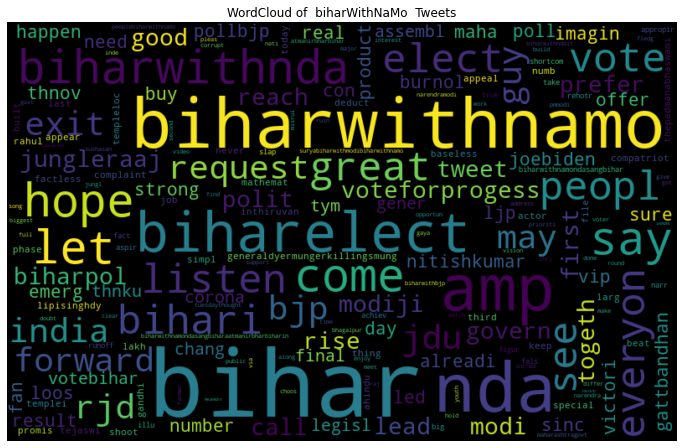

In [30]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of  biharWithNaMo  Tweets")
plt.show()

# **Sentiment Analysis**

In [31]:
from textblob import TextBlob

In [32]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

33

In [33]:
df1['Processed_Tweet']

0     [joebiden, fan, india, burnol, offer, product,...
1     [bihar, elect, exit, pollbjp, jdu, rjd, con, l...
5     [everyon, loos, hope, bihar, alreadi, exit, po...
6     [sure, led, nda, emerg, victori, result, day, ...
9     [request, everyon, bihar, come, forward, amp, ...
10    [request, everyon, bihar, come, forward, amp, ...
11    [elect, imagin, happen, rjd, amp, call, maha, ...
12    [let, votebihar, legisl, assembl, gener, elect...
13    [final, vote, first, tym, thnku, corona, hope,...
14    [generaldyermungerkillingsmung, shoot, complai...
16    [today, third, last, phase, biharelect, appeal...
20    [rahul, gandhi, biharelect, special, appear, a...
22    [say, never, built, great, thing, thepadmanabh...
23    [beat, baseless, factless, promis, tejaswi, la...
24    [biharwithnamondasangbihar, take, bihar, short...
25    [slap, runoff, fals, rehotr, narr, true, fact,...
31      [suryabiharwithmodibiharwithnamo, biharwithbjp]
32    [peopl, biharwithnda, biharwithnamo, pleas

**# Classifying tweets as neutral, positive, negative**


In [34]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 15
Negative Tweets: 2
Neutral Tweets 16


In [35]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,0.813,0.187,0.3182
1,0.000,0.769,0.231,0.5106
2,0.000,0.724,0.276,0.4939
3,0.000,0.526,0.474,0.7964
4,0.000,1.000,0.000,0.0000
5,0.000,1.000,0.000,0.0000
6,0.000,1.000,0.000,0.0000
7,0.000,1.000,0.000,0.0000
8,0.000,0.734,0.266,0.4404
9,0.605,0.395,0.000,-0.5574


In [37]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.813,0.187,0.3182,Positive
1,0.0,0.769,0.231,0.5106,Positive
2,0.0,0.724,0.276,0.4939,Positive
3,0.0,0.526,0.474,0.7964,Positive
4,0.0,1.000,0.000,0.0000,Neutral


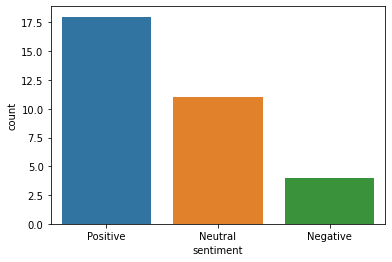

In [38]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)